In [1]:
import cv2 as c
import numpy as np
import pandas as pd
import seaborn as sns
import time as t
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('timecondition.csv')
df.head()

,DISTANCE(m),TIME(sec),Unnamed: 2
0,0,0,NaN
1,4,8,NaN
2,8,16,NaN
3,12,24,NaN
4,16,32,NaN


In [3]:
df.rename(columns={"DISTANCE(m)":'DISTANCE',"TIME(sec)":'TIME'},inplace=True)

In [4]:
data=df[['DISTANCE','TIME']]

In [5]:
# split the dataset into train and test
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [6]:
X_train = np.asanyarray(train[['DISTANCE']])
Y_train= np.asanyarray(train[['TIME']])
X_test= np.asanyarray(test[['DISTANCE']])
Y_test=np.asanyarray(test[['TIME']])

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [8]:
Y_pred=regressor.predict(X_test)

Text(0, 0.5, 'time')

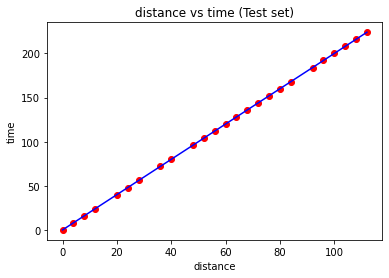

In [9]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('distance vs time (Test set)')
plt.xlabel('distance')
plt.ylabel('time')

In [10]:
from sklearn.metrics import r2_score
print(r2_score(Y_pred,Y_test))

1.0


In [11]:
print(round(regressor.predict([[100]])[0][0],1))

200.0


In [12]:
# load yolo
net=c.dnn.readNet("yolov3.weights","yolov3.cfg")
classes=[]
with open("coco.names","r") as f:
    classes=[line.strip() for line in f.readlines()]
layer_names=net.getLayerNames()
output_layers=[layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [14]:
# detecting objects
cap = c.VideoCapture("traffic.mp4")
font = c.FONT_HERSHEY_PLAIN
#cap.set(3,120)
#cap.set(4,300)
#cap.set(3,1280)#set frme for height
#cap.set(4,720)#set frame for height
while(cap.isOpened()):
    _,img=cap.read()
    #img=c.resize(img,(400,500))
    height, width, channels = img.shape
    blob = c.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs=net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = c.dnn.NMSBoxes(boxes, confidences, 0.4, 0.3) 
    tx,ty,tw,th=0,1000,0,0
    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h=boxes[i]
            if(ty>y):
                ty=y
                tx=x
                tw=w
                th=h
            #label=str(classes[class_ids[i]])
    #print(tx,ty,tw,th)
    c.rectangle(img, (tx, ty), (tx + tw, ty + th),(0,255,0), 2)
    if(tw!=0):
        dist=(10)*(300/tw)
        out=int(dist)
        time=round(regressor.predict([[out]])[0][0],1)
        time=int(time)
        text="time is:"+str(time)+" sec"
        c.putText(img,text,(tx,ty),font,1,(0,255,255),2,c.LINE_AA)
        c.circle(img, (200, 200), 30, (0, 255, 0), -1)
        for i in range(time*1000):
            c.circle(img, (200, 200), 30, (0, 0,255), -1) 
            
        print(text)
            #c.putText(img, label , (x, y + 30), font, 2, (0,0,0), 2) 
    if(c.waitKey(1) & 0xFF == ord('q')):
        break        
    c.imshow('Image',img)
cap.release()
c.destroyAllWindows()

time is:132 sec
time is:142 sec
time is:132 sec
time is:314 sec
time is:314 sec
time is:314 sec
time is:374 sec
time is:374 sec
time is:332 sec
time is:300 sec
time is:300 sec
time is:332 sec
time is:284 sec
time is:332 sec
time is:132 sec
time is:374 sec
time is:332 sec
time is:352 sec
time is:314 sec


In [16]:
cap = c.VideoCapture("traffic.mp4")
cap1=c.VideoCapture("moving.mp4")
font = c.FONT_HERSHEY_PLAIN
time1,time=0,0
while(cap.isOpened() or cap1.isOpened()):
    _,img=cap.read()
    img=c.resize(img,(400,500))
    height, width, channels = img.shape
    blob = c.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs=net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = c.dnn.NMSBoxes(boxes, confidences, 0.4, 0.3) 
    tx,ty,tw,th=0,1000,0,0
    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h=boxes[i]
            if(ty>y):
                ty=y
                tx=x
                tw=w
                th=h
            #label=str(classes[class_ids[i]])
    #print(tx,ty,tw,th)
    c.rectangle(img, (tx, ty), (tx + tw, ty + th),(0,255,0), 2)
    if(tw!=0):
        dist=(10)*(300/tw)
        out=int(dist)
        time=round(regressor.predict([[out]])[0][0],1)
        time=int(time)
        c.putText(img,text,(tx,ty),font,1,(0,255,255),2,c.LINE_AA)
        c.circle(img, (200, 200), 30, (0, 255, 0), -1)
        
    _,img1=cap1.read()
    img1=c.resize(img1,(400,500))
    height1,width1,channels=img1.shape
    blob1 = c.dnn.blobFromImage(img1, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob1)
    outs1=net.forward(output_layers)
    class_ids1 = []
    confidences1 = []
    boxes1 = []
    for out in outs1:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes1.append([x, y, w, h])
                confidences1.append(float(confidence))
                class_ids1.append(class_id)
    indexes1 = c.dnn.NMSBoxes(boxes1, confidences1, 0.4, 0.3)
    tx1,ty1,tw1,th1=0,1000,0,0
    for i in range(len(boxes1)):
        if i in indexes:
            x,y,w,h=boxes1[i]
            if(ty1>y):
                ty1=y
                tx1=x
                tw1=w
                th1=h
    c.rectangle(img1, (tx1, ty1), (tx1 + tw1, ty1 + th1),(0,255,0), 2)
    if(tw1!=0):
        dist1=(10)*(300/tw1)
        out1=int(dist1)
        time1=round(regressor.predict([[out1]])[0][0],1)
        time1=int(time1)
        c.circle(img1, (200, 200), 30, (0, 0,255), -1)
    print(time,time1)    
    if(time1<time):
        for i in range(0,time*1000):
            c.circle(img, (200, 200), 30, (0, 255,0), -1)
    elif(time<time1):
        for i in range(0,time*1000):
            c.circle(img1, (200, 200), 30, (0, 255,0), -1)
            
    if(c.waitKey(1) & 0xFF == ord('q')):
        break        
    c.imshow('Image',img)
    c.imshow('image2',img1)
cap.release()
c.destroyAllWindows()

0 0
856 666
856 600
856 600
1000 600
1000 666
1000 600
1000 214
1000 230
1000 222
856 214
1000 500
856 544
856 500
1000 544
1000 400
750 214
400 428
400 600
374 214
400 460
400 428
428 544
